**Regresión polinomial.**

*Uso de la validación cruzada (método del gradiente).*

Hello, I'm Go1234550

Realizaremos una regresión lineal múltiple para predecir el precio de compra de un vehículo haciendo uso de las siguientes variables:

* annual Salary: Indica el salario anual que percibe una persona.

* age: Corresponde a la edad de la persona.

Se consideran estas variables ya que son las que tienen mayor correlación con nuestra variable a predecir.

**Importamos las librerías.**

Importamos las librerías necesarias y, además, leemos nuestro *dataset*.

In [951]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import random

full_data_file = pd.read_csv('car_purchasing.csv', header=0, encoding='latin-1')
full_data_file

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**Paso Previo y extra (Importante)**

Analizamos la correlación de lsa variables para determinar cuales es conveniente asociar a la predicción del precio.

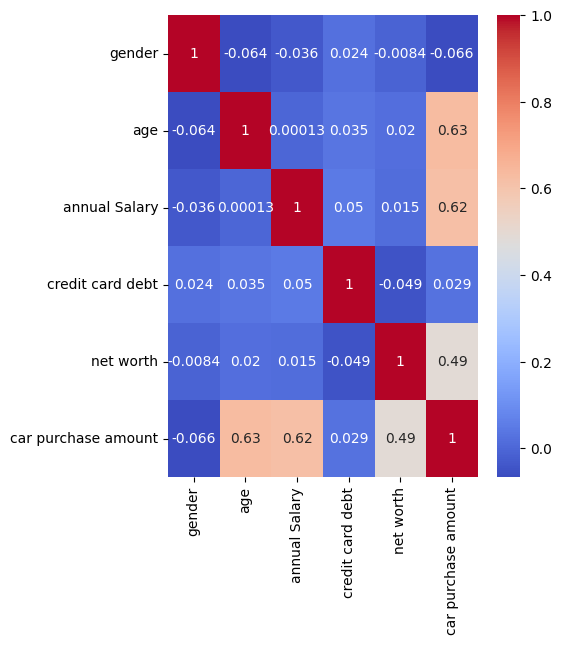

In [952]:
#Analizamos la correlación entre las variables de nuestro dataset
plt.figure(figsize=(5, 6))
#usa todas las columnas
varsHeader = pd.read_csv('car_purchasing.csv', header=0, usecols=[3,4,5,6,7,8], encoding='latin-1')
sns.heatmap(varsHeader.corr(), annot=True, cmap='coolwarm')
plt.show()

**Creamos la regresión múltiple.**

Definimos la clase de nuestra regresión múltiple junto a sus métodos.

In [953]:
class MultipleRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))

        # Initialize the random coefficients
        self.coef_ = np.random.randn(x_with_intercept.shape[1])

        # Gradient descent
        for _ in range(self.n_iter):
            gradient = -2 * x_with_intercept.T @ (y - (x_with_intercept @ self.coef_))
            self.coef_ -= self.learning_rate * gradient

        # The first coefficient is the intercept
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        # Add a column of ones to X to account for the intercept
        x_with_intercept = np.column_stack((np.ones(len(X)), X))
        
        return x_with_intercept @ np.concatenate(([self.intercept_], self.coef_))


**Realizamos el Train-Test Split**

Extraemos los datos que utilizaremos, considerando un 60% para el conjunto de entrenamiento y 40% para el de pruebas.

In [954]:
#age = column 4
x1 = pd.read_csv('car_purchasing.csv', usecols=[4], encoding='latin-1').values
#annual salary = column 5
x2 = pd.read_csv('car_purchasing.csv', usecols=[5], encoding='latin-1').values
#car purchase amount = column 8
y = pd.read_csv('car_purchasing.csv', usecols=[8], encoding='latin-1').values

# Determinate the size of the training set(60%) and the test set(40%)
train_size = int(0.6 * len(x1))

#Show the data in table with the columns
filtdata = pd.read_csv('car_purchasing.csv',  header=0, usecols=[4, 5, 8], encoding='latin-1')
filtdata

,age,annual Salary,car purchase amount
0,41.851720,62812.09301,35321.45877
1,40.870623,66646.89292,45115.52566
2,43.152897,53798.55112,42925.70921
3,58.271369,79370.03798,67422.36313
4,57.313749,59729.15130,55915.46248
...,...,...,...
495,41.462515,71942.40291,48901.44342
496,37.642000,56039.49793,31491.41457
497,53.943497,68888.77805,64147.28888
498,59.160509,49811.99062,45442.15353


**Implementación de la validación cruzada.**

Realizamos la validación cruzada, seleccionando aleatoriamente los datos para el conjunto de entrenamiento.

Evidentemente, realizaremos nuestro **entrenamiento** un cierto número de veces para obtener una metrica de evaluación.

In [955]:
#Cross Validation
vec_result = []
for i in range(5):
    # Shuffle the data indices to apply cross-validation
    idx = list(range(len(x1)))
    random.shuffle(idx)

    # Split the data into training and test sets
    x1_train = x1[idx[:train_size]]
    x2_train = x2[idx[:train_size]]
    y_train = y[idx[:train_size]]

    x1_test = x1[idx[train_size:]]
    x2_test = x2[idx[train_size:]]
    y_test = y[idx[train_size:]]

    # Convert the data to numpy arrays in one column
    x1_train = x1_train.flatten()
    x2_train = x2_train.flatten()
    y_train = y_train.flatten()

    # Prepare the data
    X = np.column_stack((x1_train, x2_train))

    # Create the model
    model = MultipleRegression(learning_rate=0.0000000000001, n_iter=100000)

    # Train the model
    model.fit(X, y_train)

    #Evaluate using the intercept and the coefficients
    vec_result.append(model.intercept_)

#Show the results
mean = np.mean(vec_result)
print("El promedio de la validación cruzada(interceptos) es: ", mean)

El promedio de la validación cruzada(interceptos) es:  0.5484361405088594


Graficamos la regresión resultante de nuestro entrenamiento.

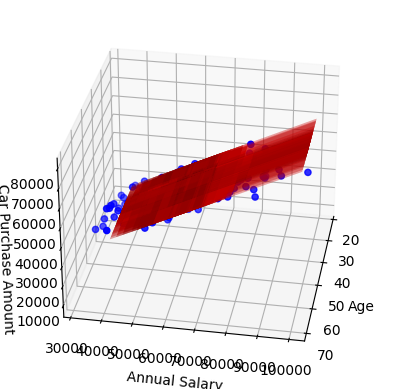

In [966]:
# Graph the data and the hiperplane
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Scatter the data
ax.scatter(x1_train, x2_train, y_train, color= 'b', marker = 'o')

# Surface of the hiperplane
xx1, xx2 = np.meshgrid(x1_train, x2_train)

# Equation of the hiperplane
yy = model.intercept_ + model.coef_[0] * xx1 + model.coef_[1] * xx2
ax.plot_surface(xx1, xx2, yy, color='r', alpha=0.1)

# Set the labels
ax.set_xlabel('Age')
ax.set_ylabel('Annual Salary')
ax.set_zlabel('Car Purchase Amount')
ax.azim = 10 #azim is the azimuth angle in the x,y plane
ax.elev = 30 #elev is the elevation angle in the z plane

Mostramos los coeficientes de la regresión.

In [957]:
#Coeficients of the regression (intercept and the coeficients of the variables)
print('Intercept:', model.intercept_)
print('Coeficients:', model.coef_)

Intercept: 0.3781214530124719
Coeficients: [0.38325126 0.70799424]


**Entrenamiento del modelo.**

Realizamos las predicciones de nuestro modelo.

Predicciones [:5]: [53442.77260236 38497.37336961 39399.29604381 47900.81173229
 58329.19590156]

Valores reales [:5]: [45738.3343  34521.17618 41320.07256 41769.38288 66363.89316]


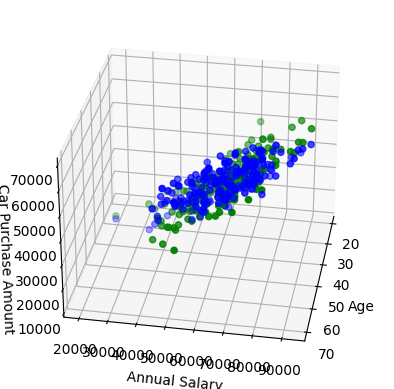

In [967]:
predicciones = model.predict(np.column_stack((x1_test, x2_test)))
print('Predicciones [:5]:', predicciones[:5])
print('\nValores reales [:5]:', y_test.flatten()[:5])

# Show the graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1_test, x2_test, predicciones, c = 'g', marker = 'o')
ax.scatter(x1_test, x2_test, y_test, c = 'b', marker = 'o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Salary')
ax.set_zlabel('Car Purchase Amount')
ax.azim = 10
ax.elev = 30
plt.show()
